In [27]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy.stats import norm as norm
from scipy import stats
sns.set(font='AppleMyungjo')
import matplotlib as mpl


In [11]:
train_merge_path = "./../Data/train/train_cleaned.tsv"

train_merge = pd.read_csv(train_merge_path, sep="\t")

In [12]:
cat = len(train_merge.select_dtypes(include=['object']).columns)
num = len(train_merge.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  0 categorical + 158 numerical = 158 features


In [13]:
#look into 102 numerical
numerical_cols = train_merge.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['pj_no', 'jukyo', 'chiseki_js_hb', 'chiseki_kb_hb', 'yoto1', 'yoto2',
       'kempei1', 'kempei2', 'yoseki1', 'yoseki2',
       ...
       'setsudo_hi', 'setsudo_kj', 'jigata', 'hiatari', 'niwasaki', 'garage',
       'kobetsu1', 'kobetsu2', 'kobetsu3', 'kobetsu4'],
      dtype='object', length=158)


In [14]:
# define feature to plot
features = ['keiyaku_pr', 'koji_hb', 'gas', 'gesui', 'tt_mseki', 'sho_super', 'sho_conv']

/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/congthanhnguyen/anaconda3/l

<Figure size 2880x3600 with 0 Axes>

<Figure size 936x576 with 0 Axes>

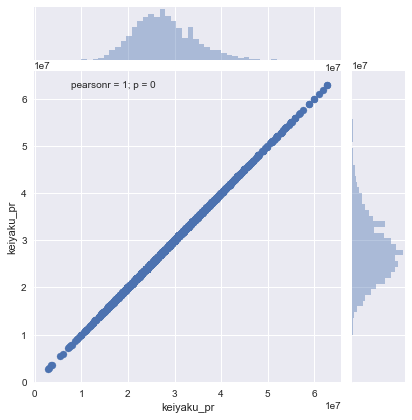

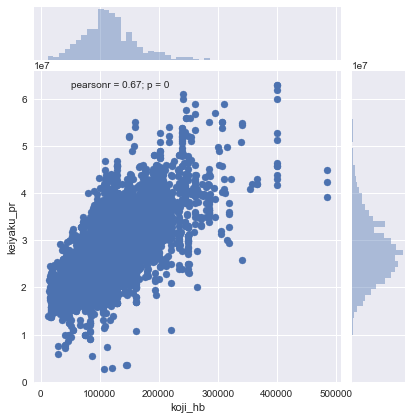

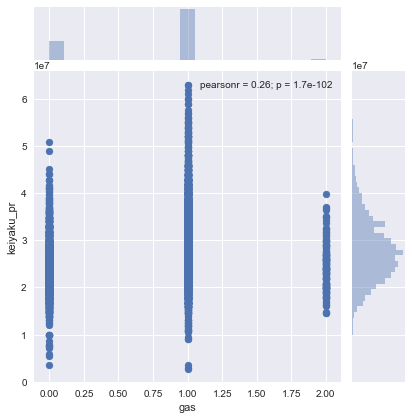

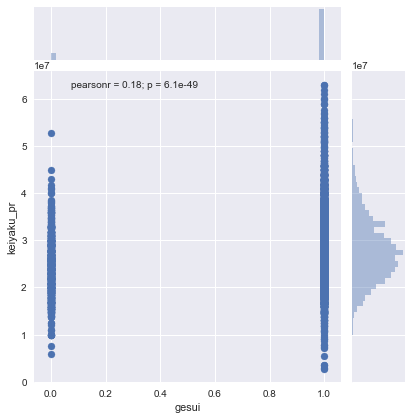

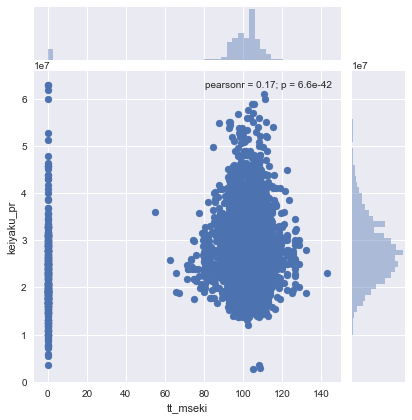

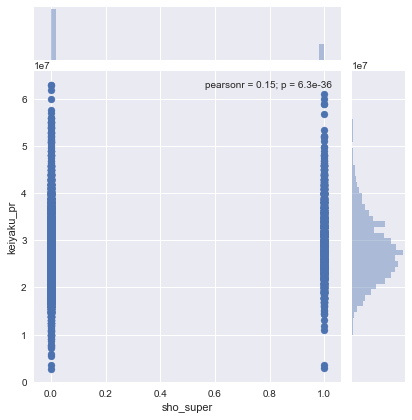

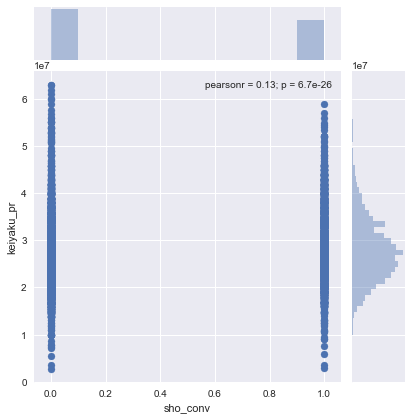

In [15]:
fig1 = plt.figure(figsize=(40,50))
fig2 = plt.figure(figsize=(13,8))
a = 1
b = 0
for feature in features:
    sns.jointplot(x=feature, y="keiyaku_pr", data=train_merge)

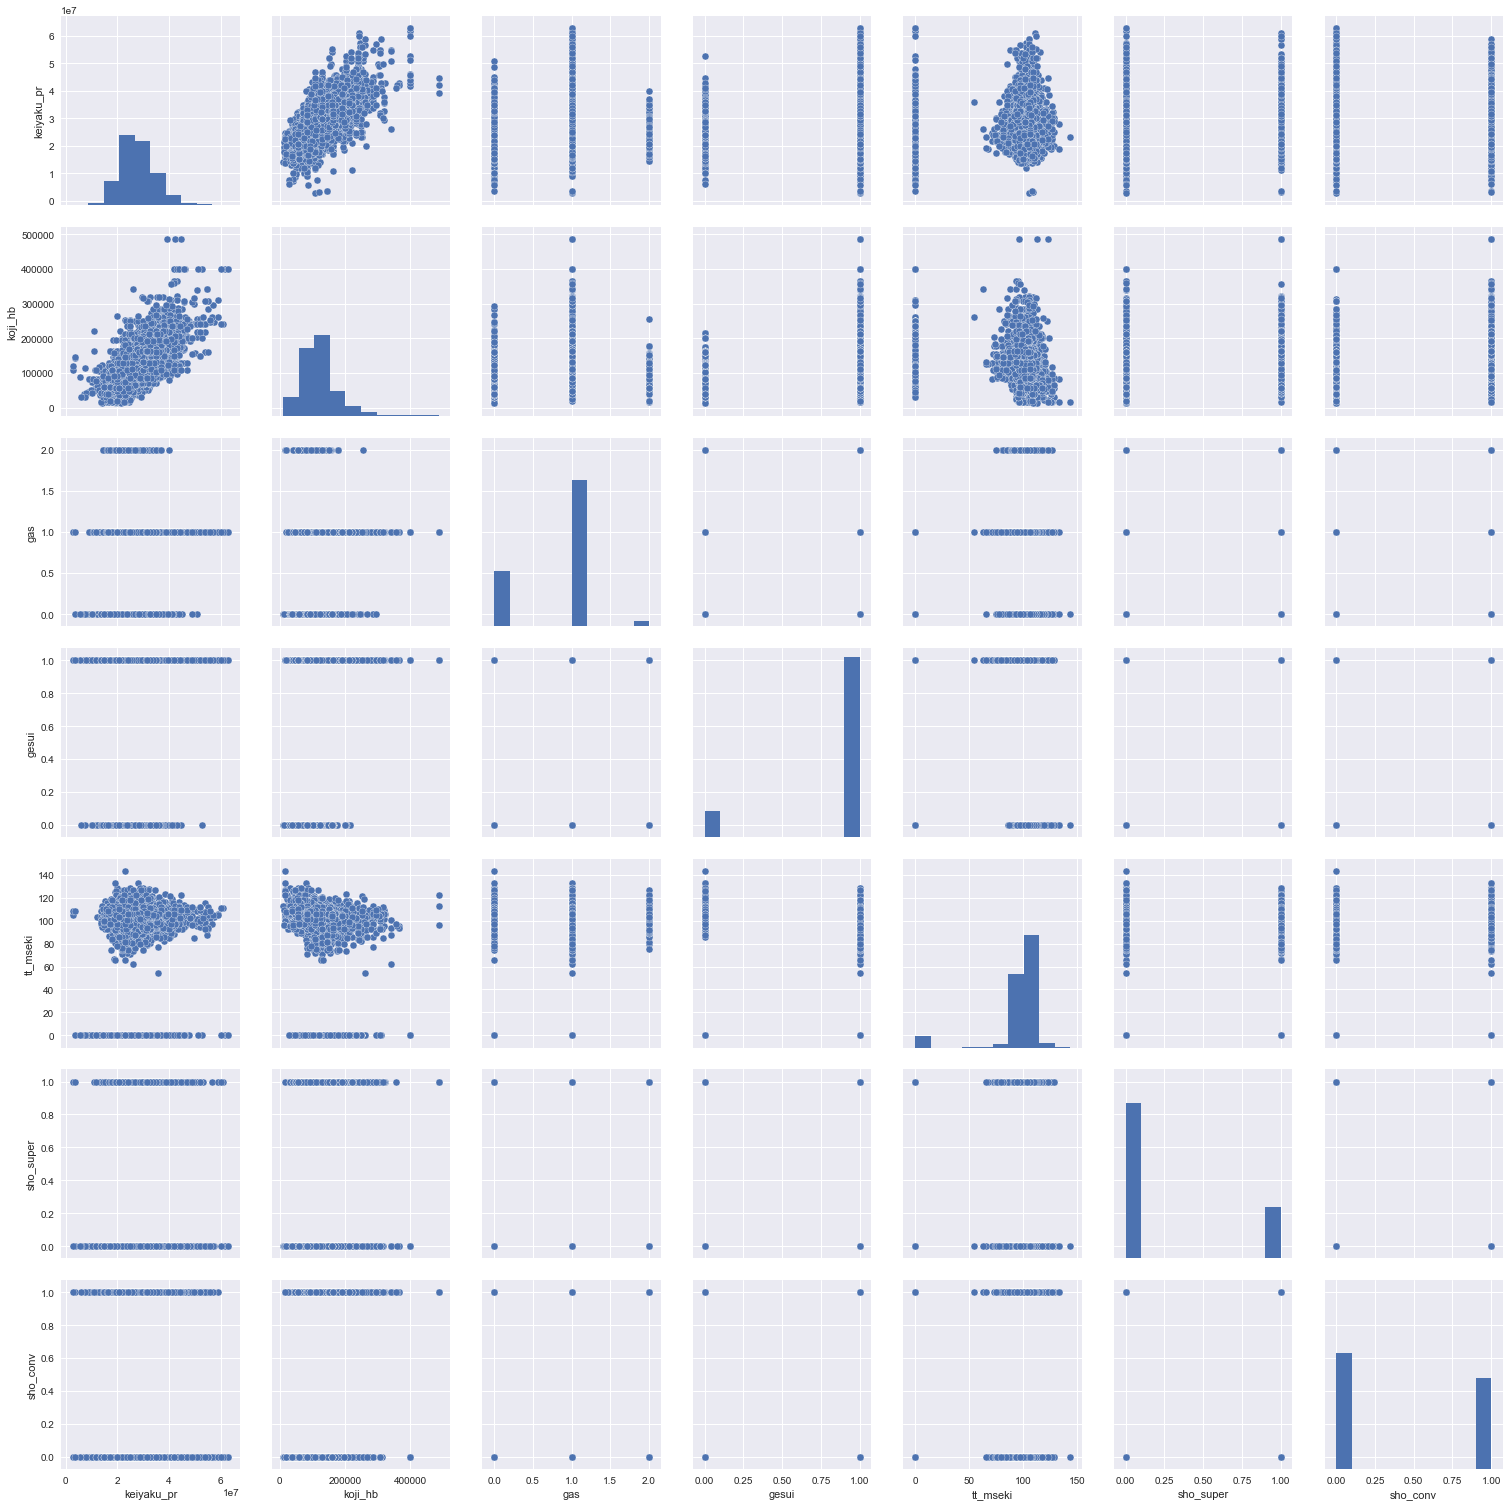

In [16]:
#scatterplot for selected columns (defined in cols)
sns.set()
sns.pairplot(train_merge[features], size = 3.0)
plt.show();

/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


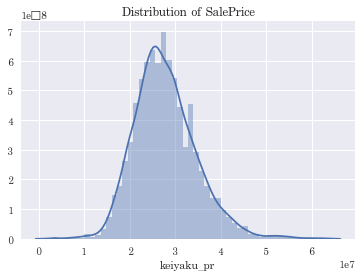

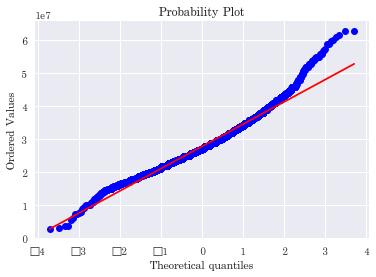

In [20]:
#distribution plot- histogram
sns.distplot(train_merge['keiyaku_pr']).set_title("Distribution of SalePrice")

# probability plot
fig = plt.figure()
res = stats.probplot(train_merge['keiyaku_pr'], plot=plt)

/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/congthanhnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")



 mean = 2.90 and std dev = 0.01



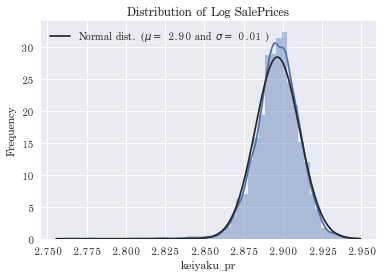

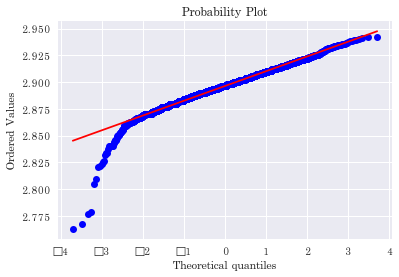

In [28]:
#Using the log1p function applies log(1+x) to all elements of the column
train_merge["keiyaku_pr"] = np.log1p(train_merge["keiyaku_pr"])

#Check the new distribution after log transformation 
sns.distplot(train_merge['keiyaku_pr'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_merge['keiyaku_pr'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(train_merge['keiyaku_pr'], plot=plt)
plt.show()